In [11]:
from shap import KernelExplainer
import shap
import matplotlib.pyplot as plt 
%matplotlib inline

import joblib
import numpy as np 
from pypal.models.gpr import predict_coregionalized
from dispersant_screener.utils import read_pickle, get_summary_stats_time
from dispersant_screener.definitions import FEATURES

from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd
DATADIR = '../data'
import os 

from functools import partial

In [12]:
def load_data(n_samples, label_scaling: bool = False):
    """Take in Brian's data and spit out some numpy arrays for the PAL"""
    df_full_factorial_feat = pd.read_csv(os.path.join(DATADIR, 'new_features_full_random.csv'))[FEATURES].values
    a2 = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['A2_normalized'].values
    deltaGMax = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['A2_normalized'].values  # pylint:disable=unused-variable
    gibbs = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_deltaG.csv'))['deltaGmin'].values * (-1)
    gibbs_max = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['deltaGmax'].values
    force_max = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_fit2.csv'))['F_repel_max'].values  # pylint:disable=unused-variable
    rg = pd.read_csv(os.path.join(DATADIR, 'rg_results.csv'))['Rg'].values
    y = np.hstack([rg.reshape(-1, 1), gibbs.reshape(-1, 1), gibbs_max.reshape(-1, 1)])
    assert len(df_full_factorial_feat) == len(a2) == len(gibbs) == len(y)

    feat_scaler = StandardScaler()
    X = feat_scaler.fit_transform(df_full_factorial_feat)

    if label_scaling:
        label_scaler = MinMaxScaler()
        y = label_scaler.fit_transform(y)

    #greedy_indices = get_maxmin_samples(X, n_samples)

    return X, y#, greedy_indice

In [13]:
X, y = load_data(1)

In [14]:
shap_values_0_001 = np.load('../work/shap/20201021-235927_dispersant_0.01_0.05_0.05_60-shap-0.npy')
shap_values_1_001 = np.load('../work/shap/20201021-235927_dispersant_0.01_0.05_0.05_60-shap-1.npy')
shap_values_2_001 = np.load('../work/shap/20201021-235927_dispersant_0.01_0.05_0.05_60-shap-2.npy')

sampled_001 = np.load('../work/sweeps3/20201021-235927_dispersant_0.01_0.05_0.05_60-selected.npy', allow_pickle=True)

shap_values_0_005 = np.load('../work/shap/20201021-235927_dispersant_0.05_0.05_0.05_60-shap-0.npy')
shap_values_1_005 = np.load('../work/shap/20201021-235927_dispersant_0.05_0.05_0.05_60-shap-1.npy')
shap_values_2_005 = np.load('../work/shap/20201021-235927_dispersant_0.05_0.05_0.05_60-shap-2.npy')

sampled_005 = np.load('../work/sweeps3/20201021-235927_dispersant_0.05_0.05_0.05_60-selected.npy', allow_pickle=True)

shap_values_0_01 = np.load('../work/shap/20201022-000105_dispersant_0.1_0.05_0.05_100-shap-0.npy')
shap_values_1_01 = np.load('../work/shap/20201022-000105_dispersant_0.1_0.05_0.05_100-shap-1.npy')
shap_values_2_01 = np.load('../work/shap/20201022-000105_dispersant_0.1_0.05_0.05_100-shap-2.npy')

sampled_01 = np.load('../work/sweeps3/20201022-000105_dispersant_0.1_0.05_0.05_100-selected.npy', allow_pickle=True)

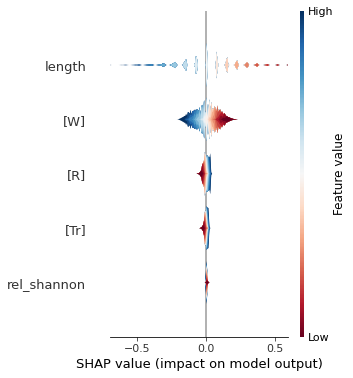

In [68]:
shap.summary_plot(shap_values_0_005, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=5, color='RdBu'
                 )
plt.savefig('shap_target_0_new.pdf', bbox_inches='tight')

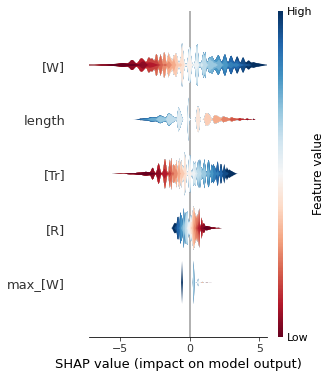

In [67]:
shap.summary_plot(shap_values_1_005, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=5, color='RdBu'
                 )
plt.savefig('shap_target_1_new.pdf', bbox_inches='tight')

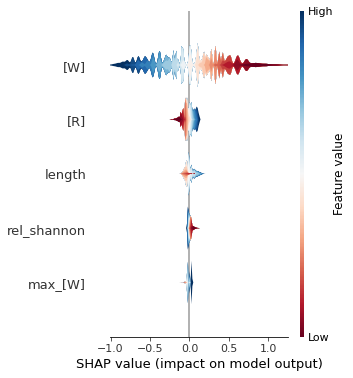

In [66]:
shap.summary_plot(shap_values_2_005, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=5, color='RdBu'
                 )
plt.savefig('shap_target_2_new.pdf', bbox_inches='tight')

 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.


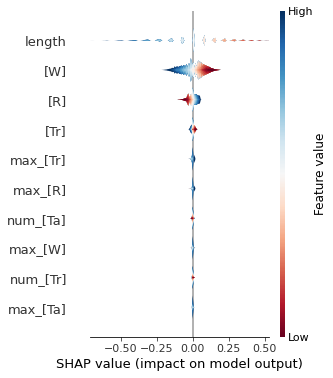

In [88]:
shap.summary_plot(shap_values_0_01, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=10, color='RdBu'
                 )
plt.savefig('shap_target_0_01.pdf', bbox_inches='tight')

 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.


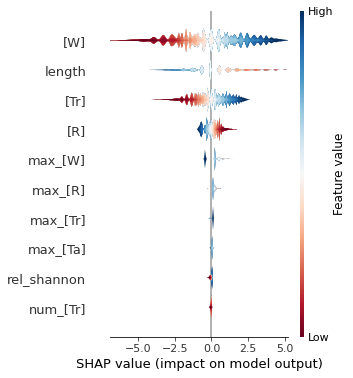

In [86]:
shap.summary_plot(shap_values_1_01, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=10, color='RdBu'
                 )
plt.savefig('shap_target_1_01.pdf', bbox_inches='tight')

 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.


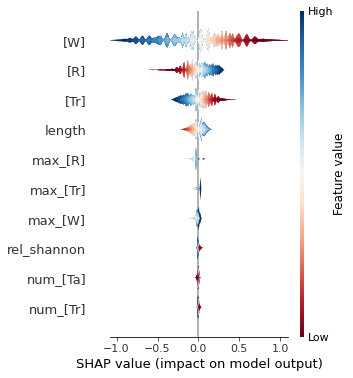

In [87]:
shap.summary_plot(shap_values_2_01, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=10, color='RdBu'
                 )
plt.savefig('shap_target_2_01.pdf', bbox_inches='tight')

 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.


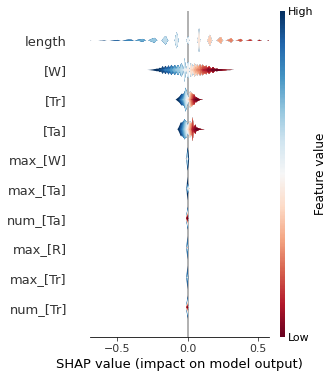

In [89]:
shap.summary_plot(shap_values_0_001, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=10, color='RdBu'
                 )
plt.savefig('shap_target_0_001.pdf', bbox_inches='tight')

 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Ta], so it'll be ignored. Try increasing the number of records to plot.


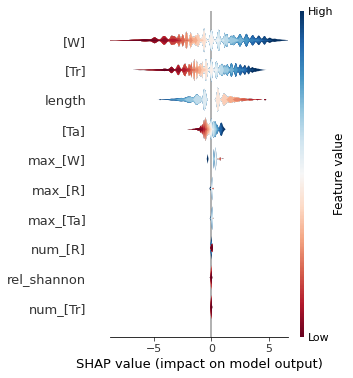

In [90]:
shap.summary_plot(shap_values_1_001, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=10, color='RdBu'
                 )
plt.savefig('shap_target_1_001.pdf', bbox_inches='tight')

 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #0 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.
 /Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/shap/plots/summary.py:379: UserWarning:not enough data in bin #1 for feature max_[Tr], so it'll be ignored. Try increasing the number of records to plot.


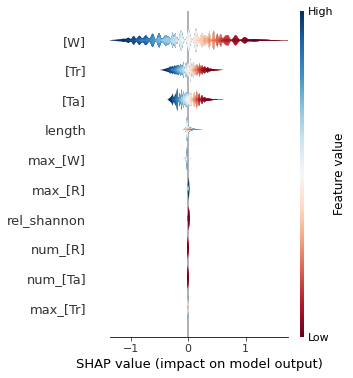

In [91]:
shap.summary_plot(shap_values_2_001, -X, 
                  plot_type='layered_violin', feature_names=FEATURES, plot_size=(4,6),
                 show=False, max_display=10, color='RdBu'
                 )
plt.savefig('shap_target_2_001.pdf', bbox_inches='tight')